In [1]:
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import pearsonr
import copy

In [2]:
def get_plot(filename):
    values = pickle.load(open("../data-examples/" + filename, "rb"))
    
    tot = len(values)

    # initialize
    results = np.empty((tot, tot))
    
    # masking the upper triangle
    results[:] = np.NaN

    # get Pearson's r for each step, do not save p
    for i in range(tot):
        for j in range(i, tot):
            results[i][j] = pearsonr(values[i], values[j])[0]
         
    # plot
    fig, ax = plt.subplots(figsize=(6,6))

    cmap = copy.copy(matplotlib.cm.get_cmap("seismic"))
    cmap.set_bad('white', 1.)

    heatmap = ax.imshow(results, cmap=cmap, origin='lower', vmin=-1, vmax=1)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.1)

    fig.colorbar(heatmap, cax = cax)

    ax.set_title(f"Correlation for {filename}", fontsize=20, pad=10)
    ax.set_xlabel("Steps", fontsize=16)
    ax.set_ylabel("Steps", fontsize=16)

    plt.show()     

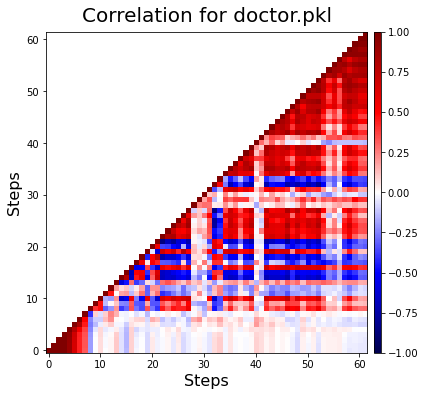

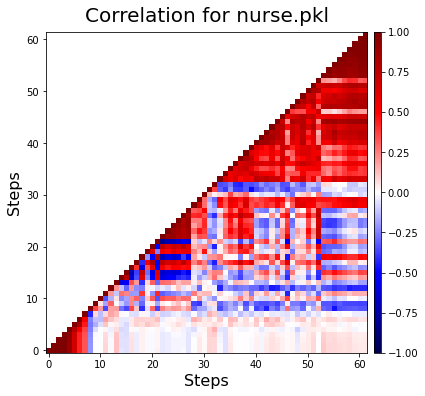

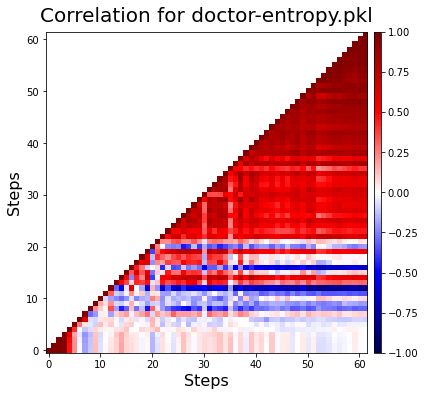

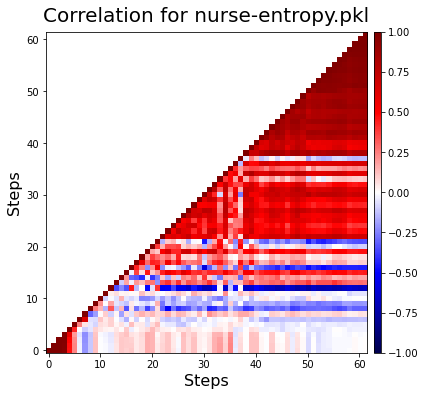

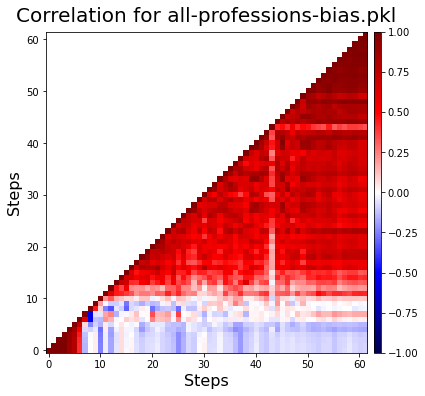

In [3]:
# first 4 across years, last one across professions

files = [
    "doctor.pkl",
    "nurse.pkl",
    "doctor-entropy.pkl",
    "nurse-entropy.pkl",
    "all-professions-bias.pkl"
]

for file in files:
    get_plot(file)

A **white** or **blue** stripe indicates that one checkpoint is very different from other checkpoints.